In [1]:
import pandas as pd
import numpy as np
import  seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('storedata.csv')

In [3]:
df

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,South Benfleet,UK,96853,Vit�ria,7,14120,110,Yes,13,Retail Park,1665074,1240813,1141898,1041041,6,202,18,14,Bad
132,Sandy,UK,96858,Mat�as,6,11205,103,No,15,Shopping Centre,1657769,1424404,1378708,1160929,5,203,13,18,Bad
133,Sheerness,UK,98062,Gustavo,7,16190,115,No,19,Shopping Centre,1407456,1359511,1200486,1063718,7,341,18,18,Bad
134,Salford,UK,98923,Rafael,6,15516,113,No,17,High Street,1451087,1245725,1127276,1045154,11,261,14,10,Bad


In [4]:
df.shape

(136, 19)

In [5]:
df.dtypes

Town                  object
Country               object
Store ID               int64
Manager name          object
Staff                  int64
Floor Space            int64
Window                 int64
Car park              object
Demographic score      int64
Location              object
40min population       int64
30 min population      int64
20 min population      int64
10 min population      int64
Store age              int64
Clearance space        int64
Competition number     int64
Competition score      int64
Performance           object
dtype: object

In [6]:
df.isna().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [7]:
df.isnull().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [8]:
df['Manager name'].unique()

array(['Roger', 'Ella', 'Valentina', 'Antonia', 'Gabriel', 'Sarah',
       'James', 'Ashley', 'Guilherme', 'Grace', 'Franco', 'Olivia',
       'Emily', 'Matheus', 'Megane', 'Samuel', 'Emma', 'Agustina',
       'Justin', 'Sebasti�n', 'Isabella', 'Laurence', 'J�lia', 'Luc�a',
       'Nicol�s', 'Sof�a', 'Luiz', 'Abigail', 'Fernanda', 'Mart�n',
       'Nathan', 'Francisca', 'Vin�cius', 'Madison', 'Hannah', 'Antony',
       'Tom�s', 'Samantha', 'Ryan', 'Logan', 'Sydney', 'Jeremy',
       'Larissa', 'Ava', 'Jacob', 'Yasmin', 'Vicente', 'Ethan', 'Micaela',
       'Matthew', 'Jo�o', 'Taylor', 'Xavier', 'Beatriz', 'Olivier',
       'Christopher', 'Sophia', 'Dylan', 'Jessica', 'Ana', 'Connor',
       'Julie', 'Liam', 'Jo', 'Victoria', 'Daniel', 'Camila', 'Lucas',
       'Diego', 'Megan', 'Martina', 'Noemie', 'Rosalie', 'Andrew',
       'Catalina', 'Alexis', 'Giovanna', 'Jos�', 'Felix', 'Audrey',
       'Nicholas', 'Benjam�n', 'Crist�bal', 'Noah', 'Joshua', 'Maria',
       'Kate', 'Michael', 'Thi

In [9]:
def func(x):
    # lister = []
    gene = x.to_list()
    for i in range(len(gene)):
        if gene[i] == 'Sebasti�n':
            gene[i] = 'Sebatian'        
    
        elif gene[i] == 'J�lia':
            gene[i] = 'Julia'
            
        elif gene[i] == 'Nicol�s':
            gene[i] = 'Nicolas'
            
        elif gene[i] == 'Sof�a':
            gene[i] = 'Sofia'
            
        elif gene[i] == 'Luc�a':
            gene[i] = 'Lucia'
            
        elif gene[i] == 'Mart�n':
            gene[i] = 'Martin'
           
        elif gene[i] == 'Mart�n':
            gene[i] = 'Martin'
               
        elif gene[i] == 'Vin�cius':
            gene[i] = 'Vinicius'
               
        elif gene[i] == 'Tom�s':
            gene[i] = 'Tomas'
            
        elif gene[i] == 'Jo�o':
            gene[i] = 'Jojo'
            
        elif gene[i] == 'Jos�':
            gene[i] = 'Jose'
                   
        elif gene[i] == 'Benjam�n':
            gene[i] = 'Benjamin'
                   
        elif gene[i] == 'Crist�bal':
            gene[i] = 'Cristabal'
                   
        elif gene[i] == 'Agust�n':
            gene[i] = 'Agustin'
                   
        elif gene[i] == 'Mar�a':
            gene[i] = 'Maria'
                       
        elif gene[i] == 'Joaqu�n':
            gene[i] = 'Joaquan'
                       
        elif gene[i] == 'Let�cia':
            gene[i] = 'Leticia'
                       
        elif gene[i] == 'Vit�ria':
            gene[i] = 'Vitoria'  
                            
        elif gene[i] == 'Mat�as':
            gene[i] = 'Matias'   
            
    return gene

df['Manager name'] = func(df['Manager name'])

In [10]:
df['Manager name'].unique()

array(['Roger', 'Ella', 'Valentina', 'Antonia', 'Gabriel', 'Sarah',
       'James', 'Ashley', 'Guilherme', 'Grace', 'Franco', 'Olivia',
       'Emily', 'Matheus', 'Megane', 'Samuel', 'Emma', 'Agustina',
       'Justin', 'Sebatian', 'Isabella', 'Laurence', 'Julia', 'Lucia',
       'Nicolas', 'Sofia', 'Luiz', 'Abigail', 'Fernanda', 'Martin',
       'Nathan', 'Francisca', 'Vinicius', 'Madison', 'Hannah', 'Antony',
       'Tomas', 'Samantha', 'Ryan', 'Logan', 'Sydney', 'Jeremy',
       'Larissa', 'Ava', 'Jacob', 'Yasmin', 'Vicente', 'Ethan', 'Micaela',
       'Matthew', 'Jojo', 'Taylor', 'Xavier', 'Beatriz', 'Olivier',
       'Christopher', 'Sophia', 'Dylan', 'Jessica', 'Ana', 'Connor',
       'Julie', 'Liam', 'Jo', 'Victoria', 'Daniel', 'Camila', 'Lucas',
       'Diego', 'Megan', 'Martina', 'Noemie', 'Rosalie', 'Andrew',
       'Catalina', 'Alexis', 'Giovanna', 'Jose', 'Felix', 'Audrey',
       'Nicholas', 'Benjamin', 'Cristabal', 'Noah', 'Joshua', 'Maria',
       'Kate', 'Michael', 'Thia

In [11]:
df.columns

Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
       'Window', 'Car park', 'Demographic score', 'Location',
       '40min population', '30 min population', '20 min population',
       '10 min population', 'Store age', 'Clearance space',
       'Competition number', 'Competition score', 'Performance'],
      dtype='object')

In [12]:
df['Car park'].unique()

array(['Yes', 'No', 'Y', 'N'], dtype=object)

In [13]:
def car(x):
    cruise = x.to_list()
    for i in range(len(cruise)):
        if cruise[i] == 'N':
            cruise[i] = 'No'
        
        elif cruise[i] == 'Y':
            cruise[i] = 'Yes'
            
    return cruise

df['Car park'] = car(df['Car park'])

In [14]:
df['Car park'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
df.dtypes

Town                  object
Country               object
Store ID               int64
Manager name          object
Staff                  int64
Floor Space            int64
Window                 int64
Car park              object
Demographic score      int64
Location              object
40min population       int64
30 min population      int64
20 min population      int64
10 min population      int64
Store age              int64
Clearance space        int64
Competition number     int64
Competition score      int64
Performance           object
dtype: object

In [16]:
df['Town'].value_counts()

 Swinton (Greater Manchester)    1
 Shoreham-by-Sea                 1
 South Cave                      1
 Settle                          1
 Sleaford                        1
                                ..
 Stainforth                      1
 Swindon                         1
 Stanford-le-Hope                1
 Shefford                        1
 Stapleford                      1
Name: Town, Length: 136, dtype: int64

In [17]:
df['Country'].unique()

array(['UK', 'France'], dtype=object)

In [18]:
df['Location'].unique()

array(['Retail Park', 'Shopping Centre', 'High Street', 'Village'],
      dtype=object)

In [19]:
df['Performance'].unique()

array(['Good', 'Bad'], dtype=object)

In [20]:
df.corr()

C:\Users\KoDaKs\AppData\Local\Temp\ipykernel_11284\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
Store ID,1.000000,0.069173,0.014658,0.014756,0.174201,0.070286,0.015162,0.058195,0.072882,0.008830,0.072401,0.156863,-0.077005
Staff,0.069173,1.000000,0.076039,0.077630,-0.057831,-0.098366,-0.024631,-0.056310,-0.006601,-0.172655,0.110591,0.034571,0.123579
Floor Space,0.014658,0.076039,1.000000,0.999208,0.038187,0.051918,-0.032199,-0.046161,-0.096698,-0.049285,0.627324,0.073559,0.091447
Window,0.014756,0.077630,0.999208,1.000000,0.038633,0.053228,-0.028688,-0.042441,-0.091651,-0.048992,0.628509,0.074034,0.104551
Demographic score,0.174201,-0.057831,0.038187,0.038633,1.000000,0.036694,-0.007616,0.053498,0.099587,-0.014967,0.041849,-0.100716,-0.072325
40min population,0.070286,-0.098366,0.051918,0.053228,0.036694,1.000000,0.624732,0.516682,0.432857,-0.191329,-0.018234,-0.004326,0.040554
30 min population,0.015162,-0.024631,-0.032199,-0.028688,-0.007616,0.624732,1.000000,0.766158,0.667031,-0.098829,-0.093048,-0.054191,0.046811
20 min population,0.058195,-0.056310,-0.046161,-0.042441,0.053498,0.516682,0.766158,1.000000,0.807882,-0.046910,-0.085887,-0.081947,0.008492
10 min population,0.072882,-0.006601,-0.096698,-0.091651,0.099587,0.432857,0.667031,0.807882,1.000000,-0.103815,-0.053129,-0.039108,0.068781
Store age,0.008830,-0.172655,-0.049285,-0.048992,-0.014967,-0.191329,-0.098829,-0.046910,-0.103815,1.000000,-0.037935,-0.063024,-0.109725


In [21]:
df_location = pd.get_dummies(df['Location'], prefix ='location')
df= pd.concat([df, df_location], axis = 1)
del df['Location']

In [22]:
df

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,40min population,...,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,location_High Street,location_Retail Park,location_Shopping Centre,location_Village
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,1288374,...,1002340,3,238,16,16,Good,0,1,0,0
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,1086225,...,1008436,4,384,15,19,Good,0,0,1,0
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,1595638,...,1011395,11,219,13,18,Bad,0,1,0,0
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,1179395,...,1002169,5,261,15,12,Bad,1,0,0,0
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,1398558,...,1002513,7,200,19,13,Bad,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,South Benfleet,UK,96853,Vitoria,7,14120,110,Yes,13,1665074,...,1041041,6,202,18,14,Bad,0,1,0,0
132,Sandy,UK,96858,Matias,6,11205,103,No,15,1657769,...,1160929,5,203,13,18,Bad,0,0,1,0
133,Sheerness,UK,98062,Gustavo,7,16190,115,No,19,1407456,...,1063718,7,341,18,18,Bad,0,0,1,0
134,Salford,UK,98923,Rafael,6,15516,113,No,17,1451087,...,1045154,11,261,14,10,Bad,1,0,0,0


In [23]:
df.columns

Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
       'Window', 'Car park', 'Demographic score', '40min population',
       '30 min population', '20 min population', '10 min population',
       'Store age', 'Clearance space', 'Competition number',
       'Competition score', 'Performance', 'location_High Street',
       'location_Retail Park', 'location_Shopping Centre', 'location_Village'],
      dtype='object')

In [24]:
df[['Town', 'Store ID', 'Manager name', 'Staff', 'Floor Space', 'Window',
       'Demographic score', '40min population', '30 min population',
       '20 min population', '10 min population', 'Store age',
       'Clearance space', 'Competition number', 'Competition score',  'Car park', 'Country']] = df[['Town', 'Store ID', 'Manager name', 'Staff', 'Floor Space', 'Window',
       'Demographic score', '40min population', '30 min population',
       '20 min population', '10 min population', 'Store age',
       'Clearance space', 'Competition number', 'Competition score', 'Car park', 'Country']].apply(LabelEncoder().fit_transform)

In [25]:
df

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,40min population,...,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,location_High Street,location_Retail Park,location_Shopping Centre,location_Village
0,132,1,0,93,5,113,21,1,0,39,...,26,1,27,6,6,Good,0,1,0,0
1,95,1,1,28,4,115,21,1,1,12,...,40,2,86,5,9,Good,0,0,1,0
2,52,1,2,109,0,30,5,0,2,85,...,47,9,12,3,8,Bad,0,1,0,0
3,115,1,3,10,3,96,17,0,4,27,...,24,3,41,5,2,Bad,1,0,0,0
4,32,1,4,36,3,12,3,0,8,53,...,27,5,0,9,3,Bad,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,61,1,131,113,3,57,10,1,3,96,...,75,4,1,8,4,Bad,0,1,0,0
132,12,1,132,76,2,11,3,0,5,94,...,118,3,2,3,8,Bad,0,0,1,0
133,29,1,133,40,3,85,15,0,9,54,...,90,5,76,8,8,Bad,0,0,1,0
134,2,1,134,92,2,77,13,0,7,59,...,79,9,41,4,0,Bad,1,0,0,0


C:\Users\KoDaKs\AppData\Local\Temp\ipykernel_11284\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

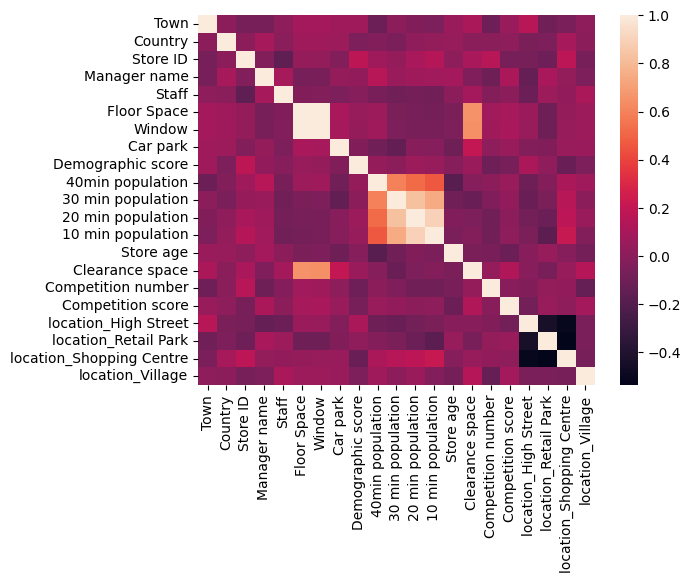

In [26]:
sns.heatmap(df.corr())

In [27]:
def corre(df, thre):
    corr_cols = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > thre:
                cols = corr.columns[i]
                corr_cols.add(cols)
                
    return corr_cols

corre(df, 0.75)

C:\Users\KoDaKs\AppData\Local\Temp\ipykernel_11284\2816206501.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


{'10 min population', '20 min population', 'Window'}

In [28]:
df = df.drop([ 'Window','10 min population', '20 min population'], axis =1)

In [29]:
X = df.drop(['Performance'], axis = 1)
y = df['Performance']

In [30]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [31]:
regr = LogisticRegression()
regr.fit(X_train, y_train)

c:\users\kodaks\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
pred = regr.predict(X_test)

In [33]:
regr.score(X_test,y_test)

0.8088235294117647

In [34]:
regr.score(X_train, y_train)

0.8676470588235294

In [35]:
pred

array(['Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Good',
       'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Good',
       'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad',
       'Good', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Good',
       'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Good',
       'Good', 'Good', 'Bad', 'Good', 'Good'], dtype=object)